In [1]:
import numpy as np
import cv2
from sklearn.model_selection import train_test_split, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject


In [2]:
ravi = np.load('ravi.npy')
unknown = np.load('unknown.npy')

In [3]:
ravi.shape

(400, 50, 50)

In [4]:
unknown.shape

(400, 50, 50)

In [5]:
import matplotlib.pyplot as plt

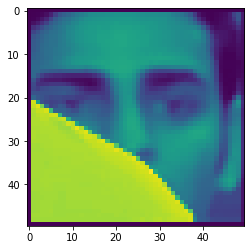

In [6]:
plt.imshow(unknown[50])

In [7]:
data = np.concatenate([ravi, unknown])

In [8]:
data.shape

(800, 50, 50)

In [9]:
data = data / 255.0

In [10]:
data[0]

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.25098039, 0.25098039, ..., 0.17254902, 0.2627451 ,
        0.43137255],
       [0.        , 0.28627451, 0.21176471, ..., 0.31764706, 0.29019608,
        0.48235294],
       ...,
       [0.        , 0.82352941, 0.83529412, ..., 0.90980392, 0.9254902 ,
        0.89019608],
       [0.        , 0.79607843, 0.81176471, ..., 0.91372549, 0.90980392,
        0.89803922],
       [0.        , 0.73333333, 0.7372549 , ..., 0.92156863, 0.91764706,
        0.89411765]])

In [11]:
labels = np.zeros(data.shape[0])

In [12]:
labels[400:] = 1.0

In [13]:
np.unique(labels, return_counts=True)

(array([0., 1.]), array([400, 400], dtype=int64))

In [14]:
data = data.reshape(data.shape[0], -1)

In [15]:
data.shape

(800, 2500)

In [21]:
np.random.seed(111)
np.random.shuffle(data)
np.random.shuffle(labels)

In [22]:
#x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.25, random_state=1254)

cross_validation = KFold(n_splits=5)

for train_index, test_index in cross_validation.split(data):
#     print(train_index, test_index)
    x_train, x_test = data[train_index], data[test_index]
    y_train, y_test = labels[train_index], labels[test_index]
    
    logistic = LogisticRegression()
    logistic.fit(x_train, y_train)
    
    y_pred = logistic.predict(x_test)
    
    acc = accuracy_score(y_test, y_pred)
    print("Accuracy :",acc)



F:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy : 0.58125


F:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy : 0.55625


F:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy : 0.51875


F:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy : 0.54375
Accuracy : 0.56875


F:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [24]:
haar_data = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

cap = cv2.VideoCapture(0)
# cap = cv2.VideoCapture('video_1.mp4')

font = cv2.FONT_HERSHEY_COMPLEX

flag = True
while True:
    flag, img = cap.read()
    #img = cv2.imread('image_1.jpg')
    if flag:
        img = cv2.resize(img, None, fx=0.8, fy=0.8)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        faces = haar_data.detectMultiScale(img, 1.3)
        for x,y,w,h in faces:
            cv2.rectangle(img, (x,y), (x+w, y+h), (0,0,0), 4)
            
            face = img[y:y+h, x:x+w]
            face = cv2.resize(face, (50,50))
            face = face.reshape(1,-1)
            prediction = logistic.predict(face)
            if prediction == 0:
                person = 'Ravi'
            else:
                person = 'Unknown'
            #print("Person is",person)
            cv2.putText(img, person, (x,y), font, 1.0, (255,255,255), 1)
            
        cv2.imshow('result', img)
        if cv2.waitKey(2) == 27:
            break
    else:
        print("Camera not working")

cv2.destroyAllWindows()
cap.release()